In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
df=pd.read_csv('/content/drive/MyDrive/revenue.csv')

In [97]:
df['Revenue'] = df['Revenue'].str.replace(',', '').astype(float)

In [98]:
df.head()

,Month,Revenue
0,Dec 2013,346200.0
1,Jan 2014,579522.0
2,Feb 2014,64850.0
3,Mar 2014,1907743.0
4,Apr 2014,45500.0


In [99]:
df.tail()

,Month,Revenue
122,Feb 2024,8058888.0
123,Mar 2024,8058249.0
124,Apr 2024,8823294.0
125,May 2024,7636227.0
126,Jun 2024,8543991.0


In [100]:
# Converting month to Datetime
df['Month']=pd.to_datetime(df['Month'])

<ipython-input-100-96675b950011>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month']=pd.to_datetime(df['Month'])


In [101]:
df.head()

,Month,Revenue
0,2013-12-01,346200.0
1,2014-01-01,579522.0
2,2014-02-01,64850.0
3,2014-03-01,1907743.0
4,2014-04-01,45500.0


In [102]:
df.set_index('Month',inplace=True)

In [103]:
df.head()

,Revenue
Month,
2013-12-01,346200.0
2014-01-01,579522.0
2014-02-01,64850.0
2014-03-01,1907743.0
2014-04-01,45500.0


In [104]:
df.describe()

,Revenue
count,1.270000e+02
mean,3.127565e+06
std,2.890407e+06
min,4.550000e+04
25%,8.455005e+05
50%,2.027695e+06
75%,5.172872e+06
max,9.861911e+06


**Visualising the Data**

<Axes: xlabel='Month'>

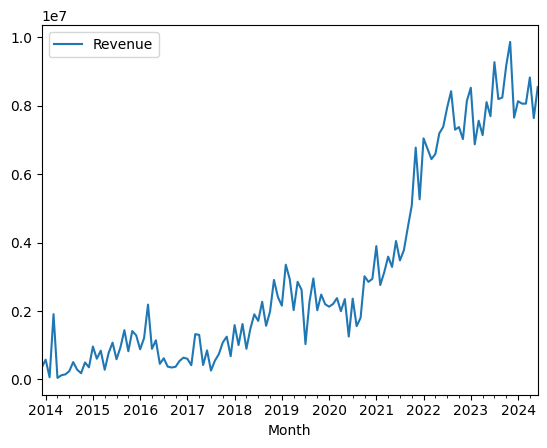

In [105]:
df.plot()

In [106]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [107]:
test_result = adfuller(df['Revenue'])

In [108]:
def adfuller_test(revenue):
    result=adfuller(revenue)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [109]:
adfuller_test(df['Revenue'])

ADF Test Statistic : 0.3011289440220117
p-value : 0.9773962224108486
#Lags Used : 2
Number of Observations Used : 124
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Differencing**

<Axes: xlabel='Month'>

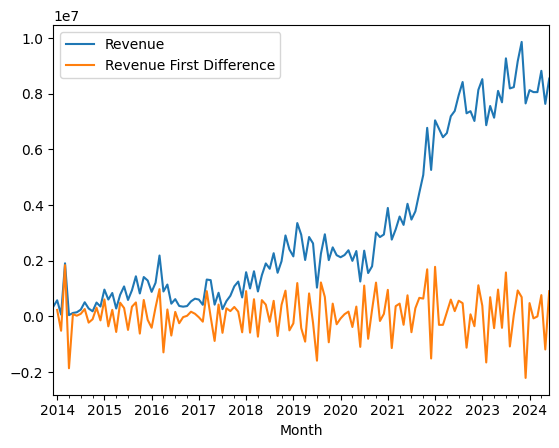

In [110]:
df['Revenue First Difference'] = df['Revenue'] - df['Revenue'].shift(1)
df.plot()

In [111]:
df['Revenue'].shift(1)

Month
2013-12-01          NaN
2014-01-01     346200.0
2014-02-01     579522.0
2014-03-01      64850.0
2014-04-01    1907743.0
                ...    
2024-02-01    8129766.0
2024-03-01    8058888.0
2024-04-01    8058249.0
2024-05-01    8823294.0
2024-06-01    7636227.0
Name: Revenue, Length: 127, dtype: float64

<Axes: xlabel='Month'>

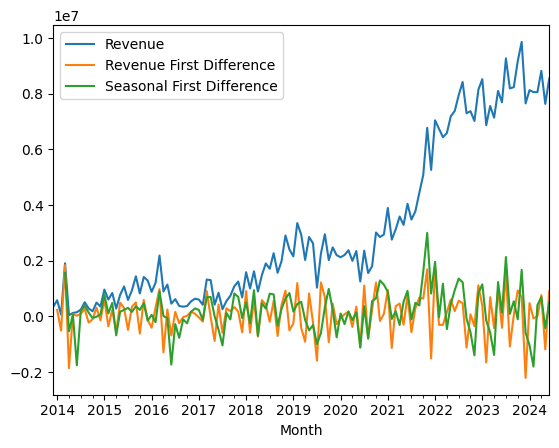

In [112]:
df['Seasonal First Difference'] = df['Revenue'] - df['Revenue'].shift(3)
df.plot()

In [113]:
df.head(4)

,Revenue,Revenue First Difference,Seasonal First Difference
Month,,,
2013-12-01,346200.0,NaN,NaN
2014-01-01,579522.0,233322.0,NaN
2014-02-01,64850.0,-514672.0,NaN
2014-03-01,1907743.0,1842893.0,1561543.0


In [114]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.138297403589162
p-value : 0.0008365913487298746
#Lags Used : 5
Number of Observations Used : 118
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

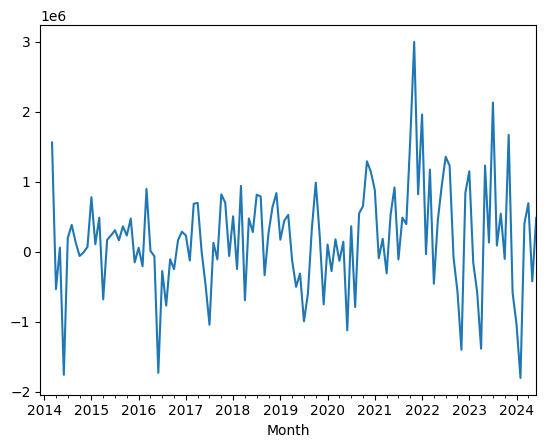

In [115]:
df['Seasonal First Difference'].plot()

In [117]:
import statsmodels.graphics.tsaplots as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

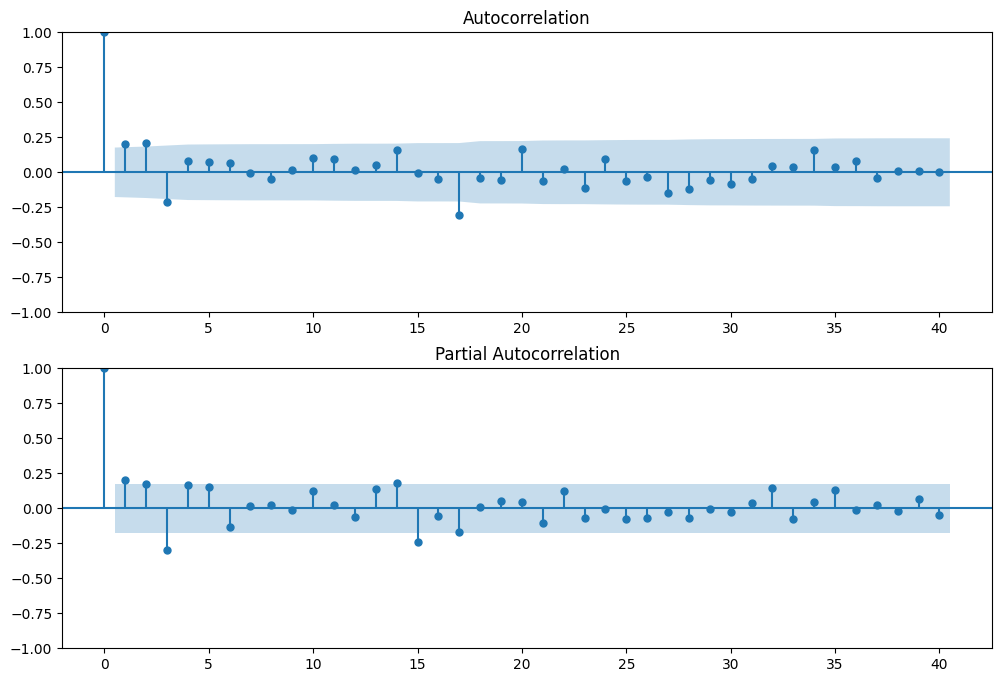

In [119]:
# Import the plot_acf and plot_pacf functions from the statsmodels.graphics.tsaplots module
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the autocorrelation and partial autocorrelation of the 'Seasonal First Difference' column
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
plot_acf(df['Seasonal First Difference'].iloc[4:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
plot_pacf(df['Seasonal First Difference'].iloc[4:], lags=40, ax=ax2)
plt.show()

In [120]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [121]:
!pip install --upgrade statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [122]:
model = ARIMA(df['Revenue'], order=(1, 1, 1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [123]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  127
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1861.524
Date:                Thu, 23 May 2024   AIC                           3729.048
Time:                        12:47:43   BIC                           3737.557
Sample:                    12-01-2013   HQIC                          3732.505
                         - 06-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2301      0.141     -1.632      0.103      -0.506       0.046
ma.L1         -0.3697      0.117     -3.156      0.002      -0.599      -0.140
sigma2      3.821e+11   1.35e-13   2.82e+24      0.000    3.82e+11    3.82e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 4.82
Prob(Q):                              0.53   Prob(JB):                         0.09
Heteroskedasticity (H):               2.74   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.45e+40. Standard errors may be unstable.
"""

<Axes: xlabel='Month'>

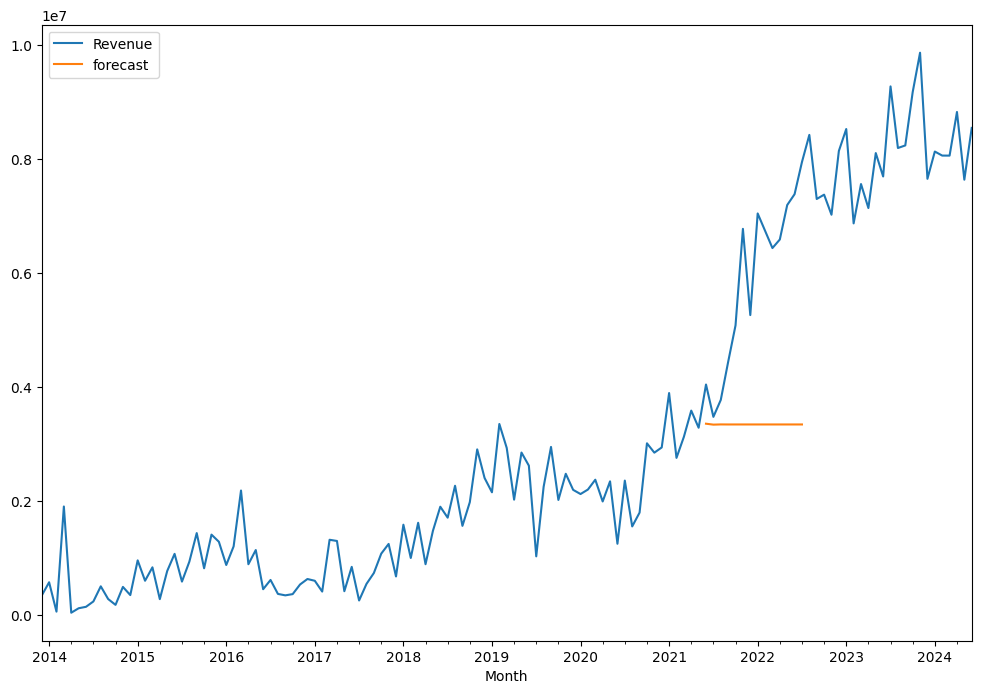

In [124]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Revenue','forecast']].plot(figsize=(12,8))

In [125]:
import statsmodels.api as sm

In [126]:
model=sm.tsa.statespace.SARIMAX(df['Revenue'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

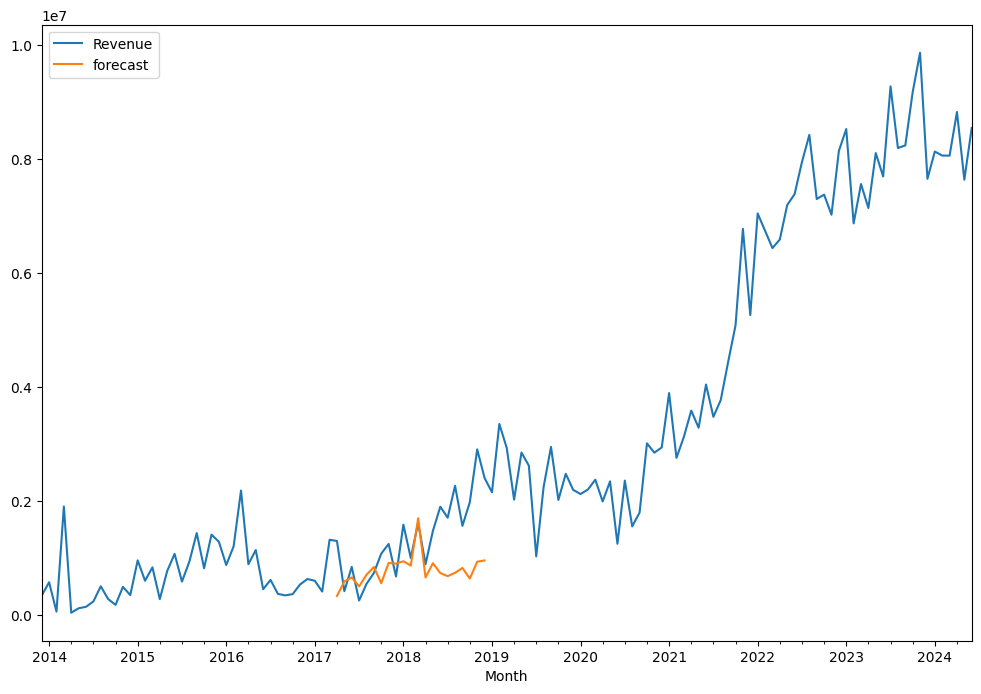

In [127]:
df['forecast']=results.predict(start=40,end=60,dynamic=True)
df[['Revenue','forecast']].plot(figsize=(12,8))

In [141]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [142]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [143]:
future_datest_df.tail()

,Revenue,Revenue First Difference,Seasonal First Difference,forecast
2026-01-01,NaN,NaN,NaN,NaN
2026-02-01,NaN,NaN,NaN,NaN
2026-03-01,NaN,NaN,NaN,NaN
2026-04-01,NaN,NaN,NaN,NaN
2026-05-01,NaN,NaN,NaN,NaN


In [144]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

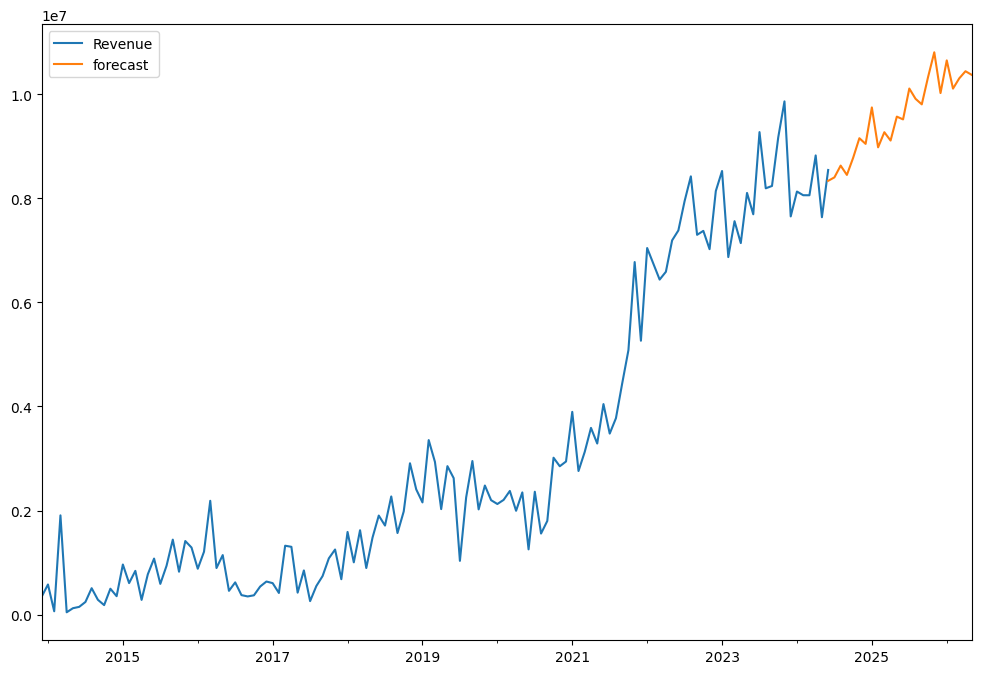

In [145]:
future_df['forecast'] = results.predict(start = 126, end = 300, dynamic= True)
future_df[['Revenue', 'forecast']].plot(figsize=(12, 8))

In [133]:
future_df['forecast']

2013-12-01   NaN
2014-01-01   NaN
2014-02-01   NaN
2014-03-01   NaN
2014-04-01   NaN
              ..
2026-01-01   NaN
2026-02-01   NaN
2026-03-01   NaN
2026-04-01   NaN
2026-05-01   NaN
Name: forecast, Length: 150, dtype: float64